# Arrhytmia Dataset

### Analiza zbioru danych

    * Zbiór danych zawiera 279 cech, z których 206 jest wartościami liniowymi, a pozostałe są nominalne. 
    * Badanie przeprowadzone przez H. Altay Guvenira ma na celu rozróżnienie między obecnością i brakiem arytmii serca oraz sklasyfikowanie ich do jednej z 16 grup:
         * Klasa 01 odnosi się do 'normalnych' klas EKG, 
         * klasy 02 do 15 odnoszą się do różnych klas arytmii, 
         * a klasa 16 obejmuje pozostałe niezaklasyfikowane przypadki. 
      
### Opis zadania:
Obecnie istnieje program komputerowy, który dokonuje takiej klasyfikacji, jednak istnieją różnice między klasyfikacją przeprowadzaną przez kardiologów a programy. Celem jest minimalizacja tej różnicy poprzez wykorzystanie narzędzi uczenia maszynowego. Dodatkowo, nazwy i numery identyfikacyjne pacjentów zostały niedawno usunięte z bazy danych.


In [2]:
# import libraries
import numpy as np
from openset.tools import visualization_tool
from openset.models import lof, IRW_score, template
from openset.tools import dataset_tool
from sklearn.covariance import EllipticEnvelope

In [3]:
X_train, X_test, y_train, y_test = dataset_tool.load_data(data_path='../data/arrhythmia.mat', 
                                                          test_size=0.2, 
                                                          random_state=42)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((361, 274), (361, 1), (91, 274), (91, 1))

### LOF

In [5]:
y_pred, y_score, model = lof.detect_outliers(X_train,
                                             novelty = False,
                                             n_neighbors = 15,
                                             contamination = 'auto',
                                             leaf_size = 30,
                                             metric = "minkowski",
                                             p = 2)

In [6]:
print(np.array(np.unique(y_train, return_counts=True)))
print(np.array(np.unique(y_pred, return_counts=True)))

[[  0   1]
 [307  54]]
[[  0   1]
 [328  33]]


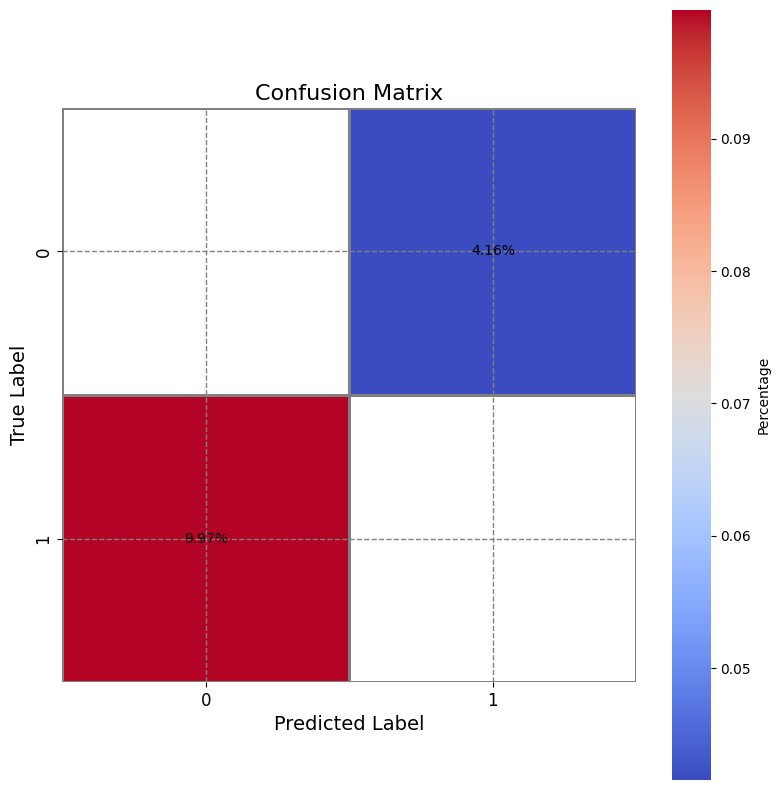

In [7]:
visualization_tool.plot_confusion_matrix(y_train, y_pred, figsize=(8, 8))

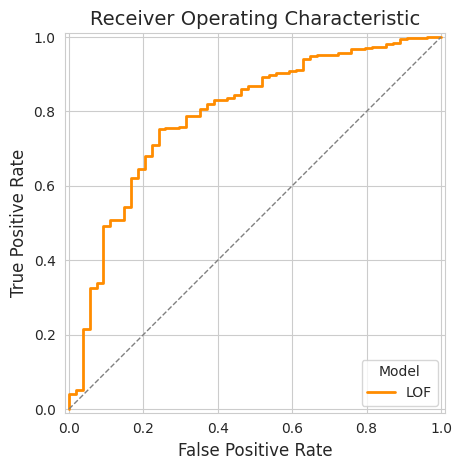

In [8]:
visualization_tool.plot_roc_curve(model, X_train, y_train)

In [9]:
df_subset = dataset_tool.perform_tsne(X_train, y_train,
                                      n_components=3,
                                      random_state=42,
                                      verbose=True)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 361 samples in 0.000s...
[t-SNE] Computed neighbors for 361 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 361 / 361
[t-SNE] Mean sigma: 63.329203
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.889378
[t-SNE] KL divergence after 750 iterations: 0.823955


In [10]:
df_subset

,tsne-1-d,tsne-2-d,tsne-3-d,y
0,-9.083549,-1.340072,-8.957216,0
1,-21.614830,6.065979,-11.350808,0
2,1.875982,-0.851159,7.786433,0
3,-10.603435,-4.421902,9.721622,0
4,-33.075352,12.269146,6.560853,1
...,...,...,...,...
356,-8.372154,20.298855,-16.328627,0
357,18.349392,-12.883243,-7.983294,0
358,-20.040276,12.445259,-18.357920,1
359,4.283905,-14.778876,-9.968204,0


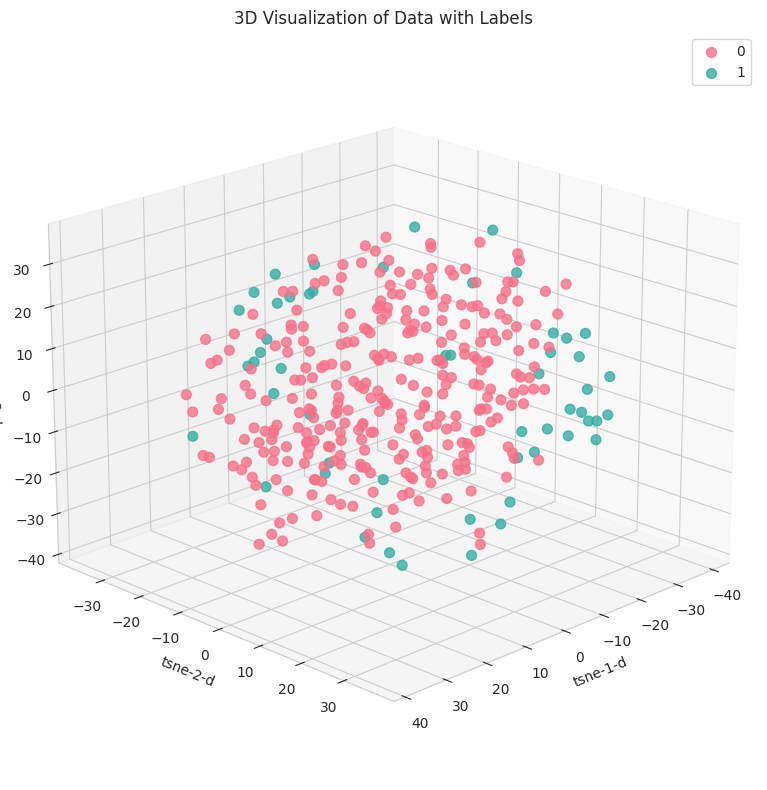

In [11]:
visualization_tool.visualize_data_3d(df_subset, 
                                     "tsne-1-d", 
                                     "tsne-2-d", 
                                     "tsne-3-d", 
                                     "y", 
                                     df_subset["y"].unique())

### IRW

In [12]:
model = IRW_score.IRWdepth()

train_scores, test_scores, ood_scores = template.fit_and_score_model(model, 
                                                                      X_train, 
                                                                      X_test, 
                                                                      y_train)

fitted IRWdepth model with 1000 projections in 361 dimensions
Model fitting completed in 0.03 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


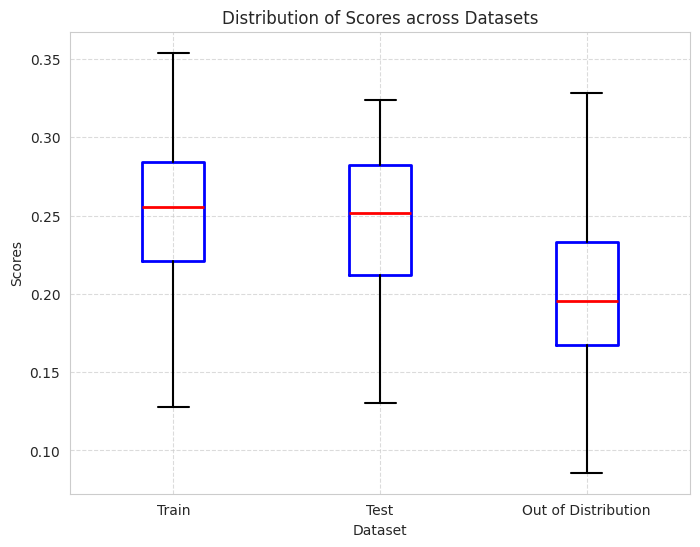

In [13]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

### Mahalanobis distance

In [14]:
model = EllipticEnvelope(contamination=0.01, random_state=42)

train_scores, test_scores, ood_scores = template.fit_and_score_model(model, 
                                                                     X_train, 
                                                                     X_test, 
                                                                     y_train)

/home/jakub/miniconda3/envs/openset/lib/python3.10/site-packages/sklearn/covariance/_robust_covariance.py:747: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


Model fitting completed in 10.29 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


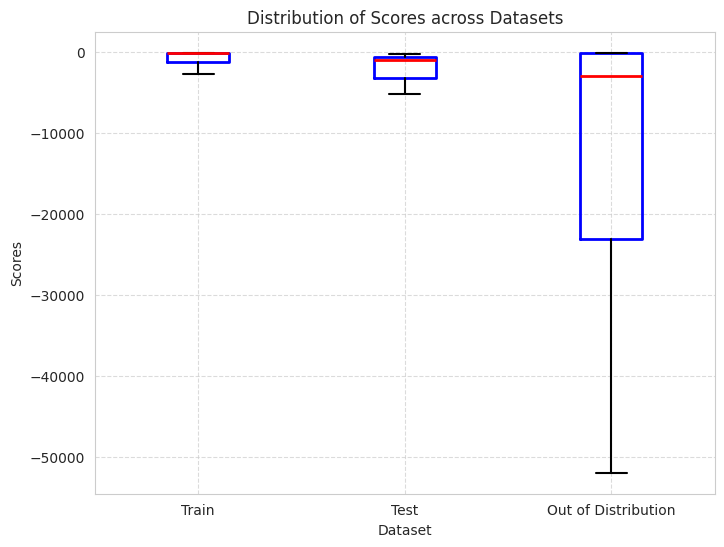

In [15]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)